In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
cm = plt.get_cmap('plasma')

In [3]:
def sd_change(A, B, C, dVH, dVV, FCF):
    return C * ((1 - FCF) * (A * dVH - dVV) + B * FCF * dVV)
sd_change = np.vectorize(sd_change)

In [4]:
# Create parameter space
A = np.round(np.arange(1, 3.1, 0.01), 2)
B = np.round(np.arange(0, 2.01, 0.01), 2)
C = np.round(np.arange(0, 1.001, 0.01), 2)

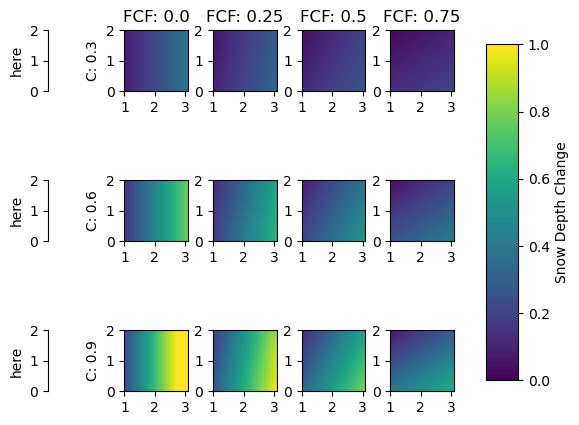

In [72]:

fig, axes = plt.subplots(3, 4) # , gridspec_kw={'width_ratios':[1,1,1,1,0.3]}

for i, fcf in enumerate(np.arange(0, 1, 0.25)):
    for ax, c in zip(axes[:, i], np.round(np.arange(0.3, 1, 0.3), 1)):
        AA, BB = np.meshgrid(A, B)
        SD = sd_change(A = AA, B = BB, C = c, dVH = 0.5, dVV = 0.25, FCF = fcf)

        im = ax.imshow(SD, extent=[A.min(), A.max(), B.min(), B.max()], vmin = 0, vmax = 1)
        # ax.set_xlabel('A Parameter')
        # ax.set_ylabel('B Parameter')
        # ax.set_title(f'fcf: {fcf}. c: {c}')
        if fcf == 0:
            ax.set_ylabel(f'C: {c}')
            twin2 = ax.secondary_yaxis(location = -1.2)
            twin2.set_ylabel('here')


    # plt.colorbar(im, label = 'SD Change')

    axes[0, i].set_title(f'FCF: {fcf}')

plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label = 'Snow Depth Change')
# plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


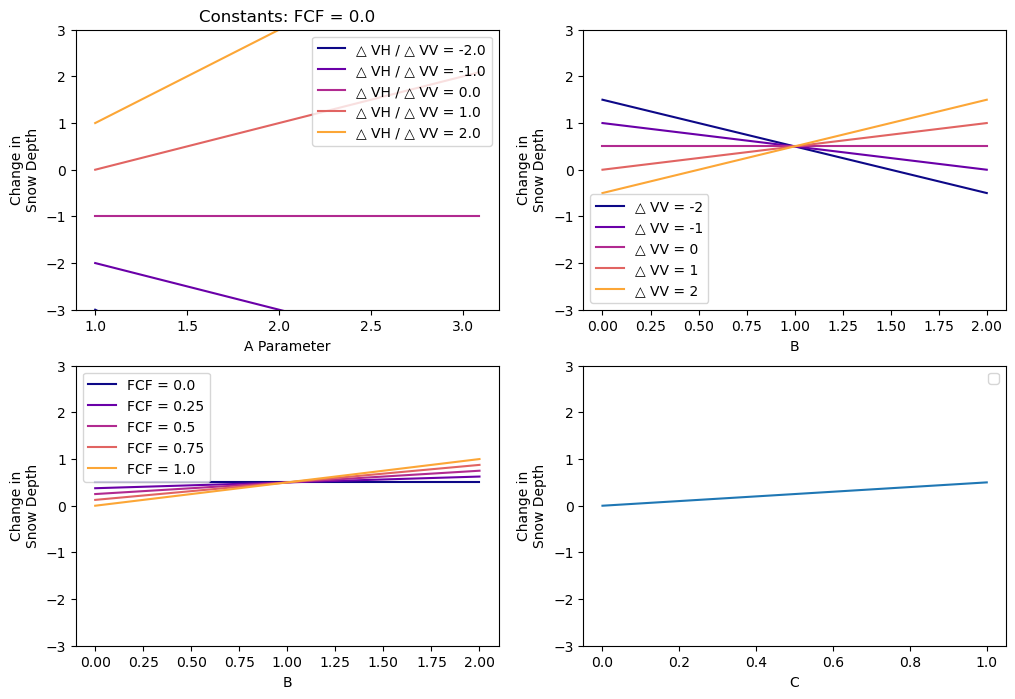

In [79]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))
axes = axes.ravel()

for i, dVH in enumerate(np.arange(-2, 3, 1)):
    axes[0].plot(A, sd_change(A = A, B = 1, C = 1, dVH = dVH, dVV = 1, FCF = 0.0), label = f'△ VH / △ VV = {dVH / 1}', color = cm(i/len(np.arange(-2, 3, 1))))
axes[0].set_xlabel('A Parameter')
axes[0].set_title('Constants: FCF = 0.0')

for i, dVV in enumerate(np.arange(-2, 3, 1)):
    axes[1].plot(B, sd_change(A = 1, B = B, C = 1, dVH = 1, dVV = dVV, FCF = 0.5), label = f'△ VV = {dVV}', color = cm(i/len(np.arange(-2, 3, 1))))
axes[1].set_xlabel('B')

for i, FCF in enumerate(np.arange(0, 1.25, 0.25)):
    axes[2].plot(B, sd_change(A = 1, B = B, C = 1, dVH = 1, dVV = 0.5, FCF = FCF), label = f'FCF = {FCF}', color = cm(i/len(np.arange(-2, 3, 1))))
axes[2].set_xlabel('B')

axes[3].plot(C, sd_change(A = 1, B = 1, C = C, dVH = 1, dVV = 0.5, FCF = 0.5))
axes[3].set_xlabel('C')


for ax in axes:
    ax.set_ylim(-3, 3)
    ax.legend()
    ax.set_ylabel('Change in\nSnow Depth')

# plt.suptitle(f'Theoretical Parameter Influences\nConstants: △VH = 1, △VV = 0.5, FCF = 0.5')

Text(0.5, 1.0, 'Change in Snow Depth with B Parameter')

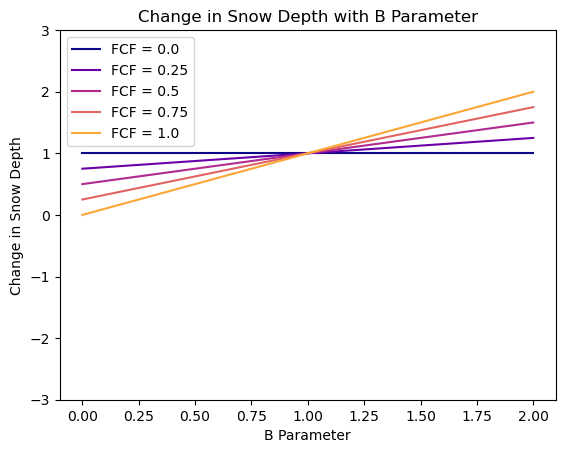

In [54]:
for i, FCF in enumerate(np.arange(0, 1.25, 0.25)):
    plt.plot(B, sd_change(A = 1, B = B, C = 1, dCR = 1, dVV = 1, FCF = FCF), label = f'FCF = {FCF}', color = cm(i/len(np.arange(-2, 3, 1))))
plt.ylim(-3, 3)
plt.legend()
plt.xlabel('B Parameter')
plt.ylabel('Change in Snow Depth')
plt.title(f'Change in Snow Depth with B Parameter')

In [ ]:
for i, FCF in enumerate(np.arange(0, 1.25, 0.25)):
    plt.plot(B, sd_change(A = 1, B = B, C = 1, dCR = 1, dVV = 1, FCF = FCF), label = f'FCF = {FCF}', color = cm(i/len(np.arange(-2, 3, 1))))
plt.ylim(-3, 3)
plt.legend()
plt.xlabel('B Parameter')
plt.ylabel('Change in Snow Depth')
plt.title(f'Change in Snow Depth with B Parameter')